In [30]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# Load the dataset
data = pd.read_csv("student-mat.csv", sep=";")


In [32]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [33]:
# Target variable: Pass/Fail based on final grade G3
data['Pass'] = np.where(data['G3'] >= 10, 1, 0)

In [34]:
# Drop original G3 column if predicting pass/fail
data.drop(['G3'], axis=1, inplace=True)

In [35]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [36]:
# Features and target
X = data.drop('Pass', axis=1)
y = data['Pass']

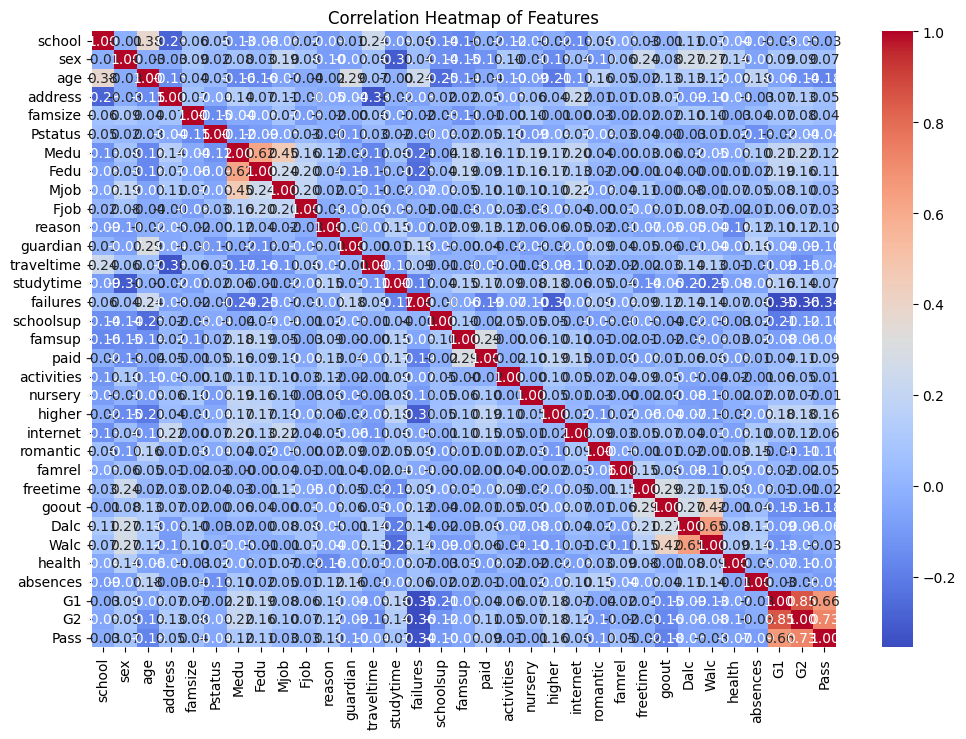

In [37]:
# 1. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

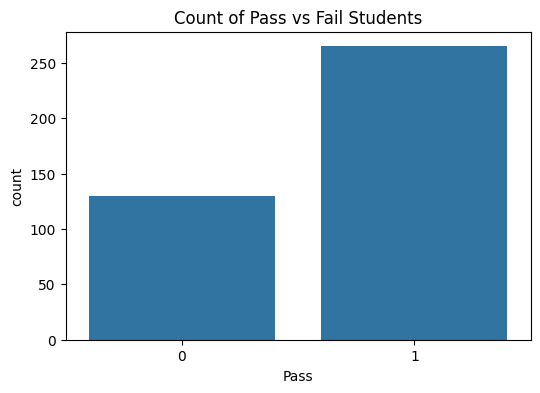

In [38]:
# 2. Countplot for Pass/Fail
plt.figure(figsize=(6,4))
sns.countplot(x='Pass', data=data)
plt.title("Count of Pass vs Fail Students")
plt.show()

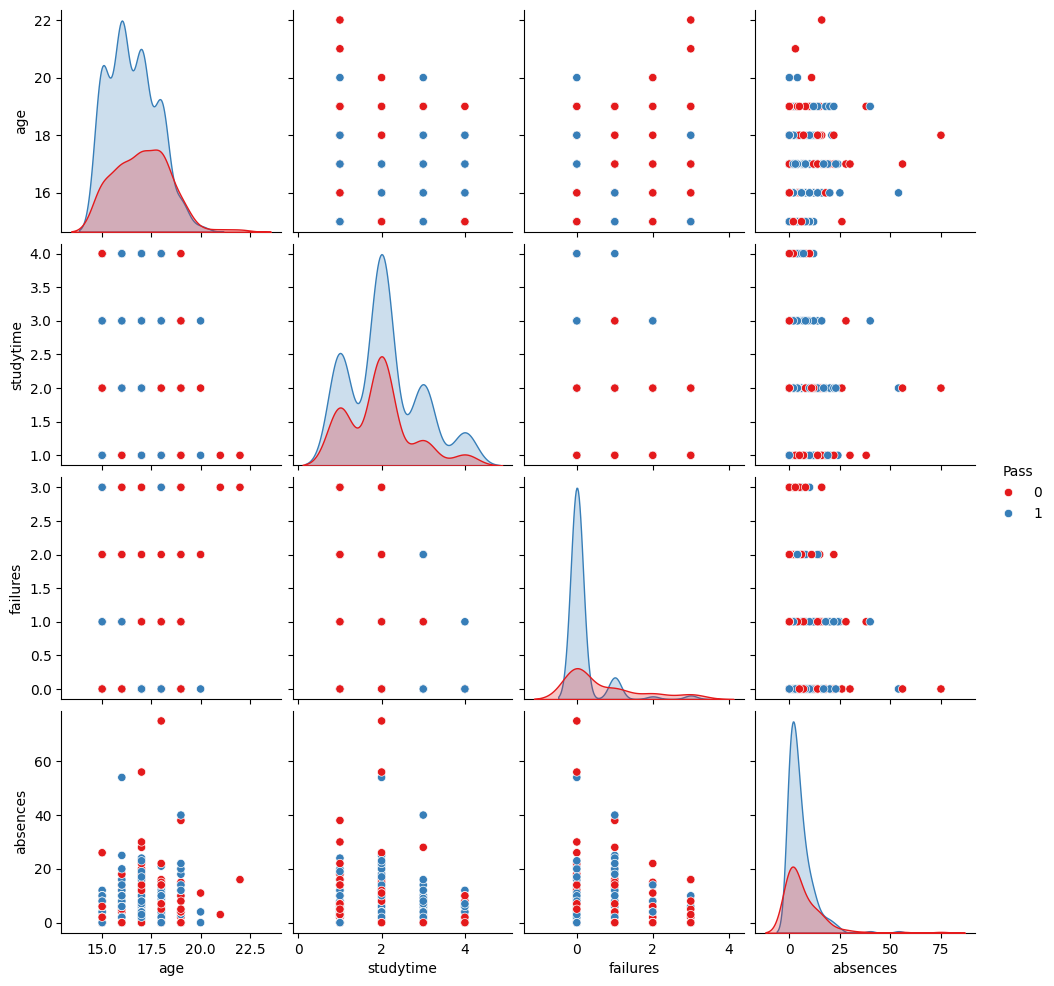

In [39]:
# 3. Pairplot of selected numeric features
numeric_cols = ['age', 'studytime', 'failures', 'absences']
sns.pairplot(data[numeric_cols + ['Pass']], hue='Pass', palette='Set1')
plt.show()

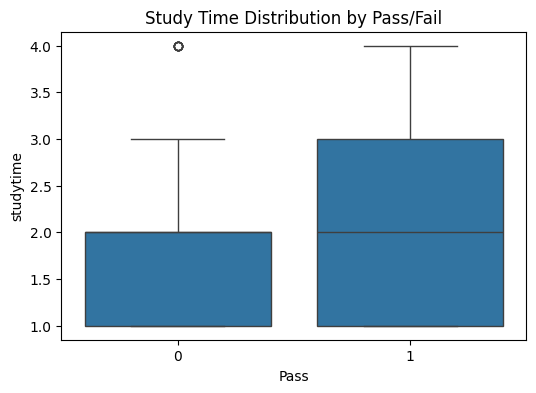

In [40]:
# 4. Distribution of study time by Pass/Fail
plt.figure(figsize=(6,4))
sns.boxplot(x='Pass', y='studytime', data=data)
plt.title("Study Time Distribution by Pass/Fail")
plt.show()

In [41]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Scale features for models like SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# 1. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8860759493670886
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79



In [44]:
# Extract rules from Decision Tree
rules = export_text(dt, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n",rules)



Decision Tree Rules:
 |--- G2 <= 9.50
|   |--- G2 <= 8.50
|   |   |--- schoolsup <= 0.50
|   |   |   |--- class: 0
|   |   |--- schoolsup >  0.50
|   |   |   |--- Medu <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Medu >  1.50
|   |   |   |   |--- goout <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- goout >  1.50
|   |   |   |   |   |--- class: 0
|   |--- G2 >  8.50
|   |   |--- Fjob <= 2.50
|   |   |   |--- Fedu <= 2.50
|   |   |   |   |--- reason <= 0.50
|   |   |   |   |   |--- goout <= 3.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- goout >  3.50
|   |   |   |   |   |   |--- Medu <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Medu >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- reason >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Fedu >  2.50
|   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sex >  0.50
|   |   |   |   |   |--- abse

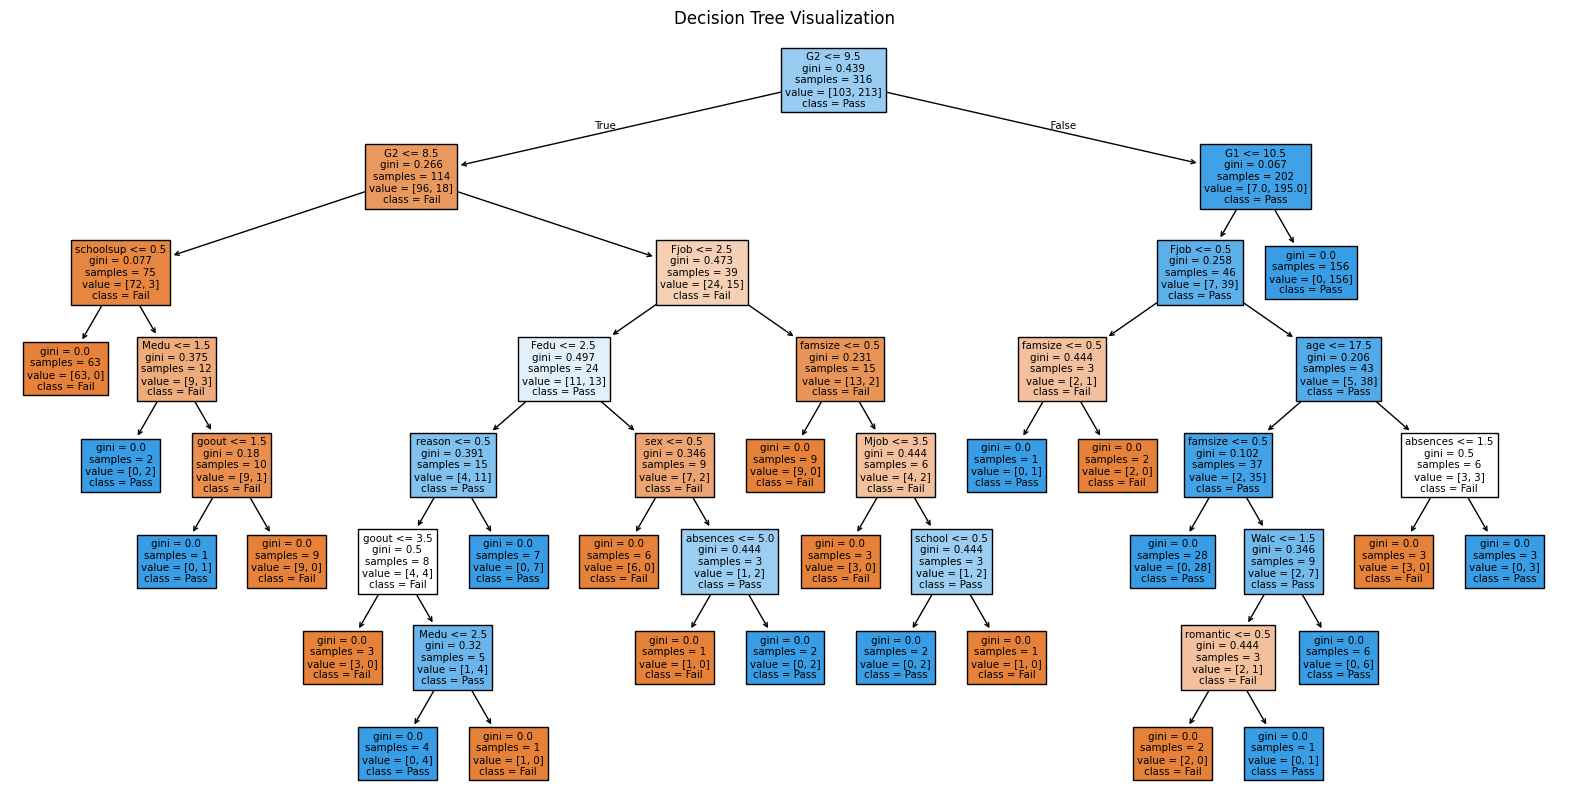

In [45]:
# Plot tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Fail','Pass'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [46]:
# Cross-validation for Decision Tree
cv_dt = cross_val_score(dt, X, y, cv=5)
print("Decision Tree CV Accuracy:", cv_dt.mean())

Decision Tree CV Accuracy: 0.8632911392405063


In [47]:
# 2. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


cv_nb = cross_val_score(nb, X, y, cv=5)
print("Naive Bayes CV Accuracy:", cv_nb.mean())

Naive Bayes Accuracy: 0.8734177215189873
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.89      0.92      0.91        52

    accuracy                           0.87        79
   macro avg       0.86      0.85      0.86        79
weighted avg       0.87      0.87      0.87        79

Naive Bayes CV Accuracy: 0.8354430379746836


In [48]:
# 3. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cv_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Accuracy:", cv_lr.mean())

Logistic Regression Accuracy: 0.9367088607594937
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79

Logistic Regression CV Accuracy: 0.898611111111111


In [49]:
# 4. Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cv_svm = cross_val_score(svm, X_train_scaled, y_train, cv=5)
print("SVM CV Accuracy:", cv_svm.mean())

SVM Accuracy: 0.9367088607594937
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79

SVM CV Accuracy: 0.9018353174603174
